In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)  # 实例化
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


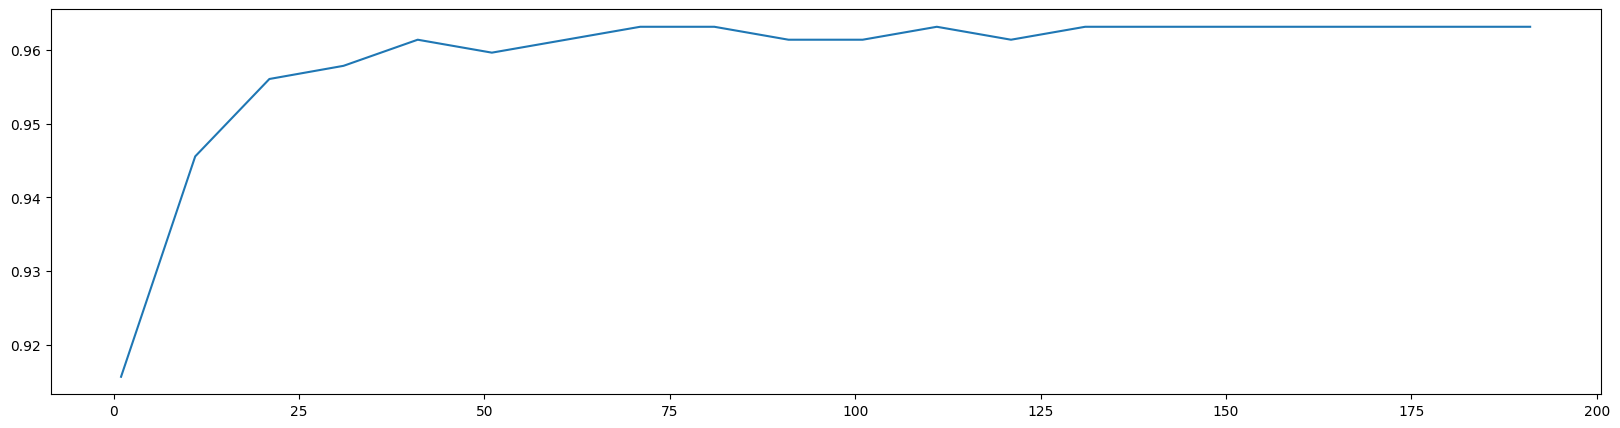

In [7]:
scorel = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i + 1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), (scorel.index(max(scorel)) * 10) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), scorel)
plt.show()

0.9666353383458647 73


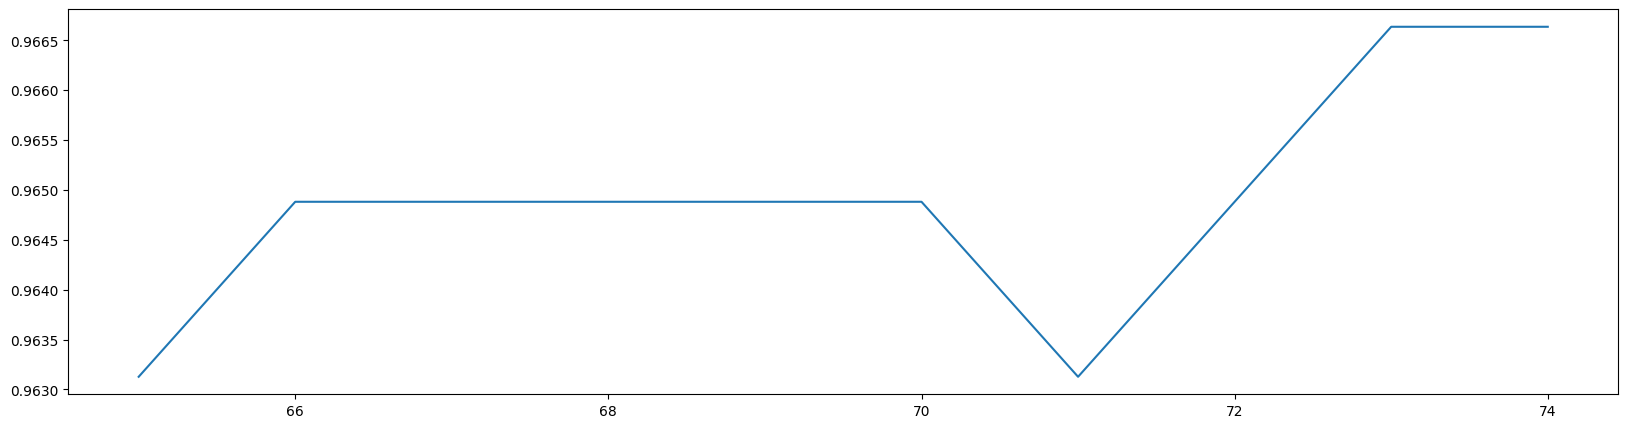

In [8]:
scorel = []
for i in range(65, 75):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)

print(max(scorel), ([*range(65, 75)][scorel.index(max(scorel))]))
plt.figure(figsize=[20, 5])
plt.plot(range(65, 75), scorel)
plt.show()

In [16]:
param_grid = {'max_depth': np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=73
                             , random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [17]:
GS.best_params_  # 显示调整出来的最佳参数

{'max_depth': 8}

In [18]:
GS.best_score_  # 返回调整好的最佳参数对应的准确率

0.9666353383458647

In [19]:
param_grid = {
    'max_features': np.arange(5, 30, 1)
}
rfc = RandomForestClassifier(n_estimators=73
                             , random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [20]:
GS.best_params_

{'max_features': 24}

In [21]:
GS.best_score_

0.9666666666666668

In [22]:
param_grid = {'min_samples_leaf': np.arange(1, 1 + 10, 1)}
rfc = RandomForestClassifier(n_estimators=73
                             , random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [23]:
GS.best_params_

{'min_samples_leaf': 1}

In [24]:
GS.best_score_

0.9666353383458647

In [25]:
param_grid = {'min_samples_split': np.arange(2, 2 + 20, 1)}
rfc = RandomForestClassifier(n_estimators=73
                             , random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [26]:
GS.best_params_

{'min_samples_split': 2}

In [27]:
GS.best_score_

0.9666353383458647

In [29]:
param_grid = {'criterion': ['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=73
                             , random_state=90
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [30]:
GS.best_params_

{'criterion': 'gini'}

In [31]:
GS.best_score_

0.9666353383458647

In [32]:
rfc = RandomForestClassifier(n_estimators=73, random_state=90)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()

In [33]:
score

0.9666353383458647

In [34]:
score-score_pre

0.0017543859649122862